In [0]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Define some functions for the ease of simplicity
# Reference https://github.com/wagonhelm/NaNmnist/blob/master/NaNmnist.ipynb
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def plt_dynamic(x, y, y_1, ax, ticks,title, fig, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

In [4]:
x_train, y_train = TRAIN_SIZE(55000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)



[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


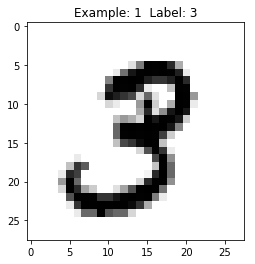

In [5]:
display_digit(1)

In [0]:
# Layers parameter
n_hidden1 = 512
n_hidden2 = 128
n_input = x_train.shape[1]
n_class = y_train.shape[1]

In [0]:
# Creating graph for the perceptron model
x = tf.placeholder(tf.float32, [None, n_input])
y_ = tf.placeholder(tf.float32, [None, n_class])
keep_prob = tf.placeholder(tf.float32)
keep_prob_input = tf.placeholder(tf.float32)

In [0]:
# Xavier/Glorot Normal initialization for SGD
std_h1_xg = (2/(n_input+n_hidden1+1))**0.5
std_h2_xg = (2/(n_hidden1+n_hidden2+1))**0.5
std_out_xg = (2/(n_hidden2+n_class+1))**0.5

#  He Normal initialization for Relu
std_h1_he = (2/(n_input+1))**0.5
std_h2_he = (2/(n_hidden1+1))**0.5
std_out_he = (2/(n_hidden2+1))**0.5

In [9]:
# Defining weights and intercept term
weights_sgd = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden1],stddev=std_h1_xg, mean=0)),   
    'h2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2],stddev=std_h2_xg, mean=0)), 
    'out': tf.Variable(tf.random_normal([n_hidden2, n_class],stddev=std_out_xg, mean=0))
}

weights_relu = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden1],stddev=std_h1_he, mean=0)),   
    'h2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2],stddev=std_h2_he, mean=0)), 
    'out': tf.Variable(tf.random_normal([n_hidden2, n_class],stddev=std_out_he, mean=0))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden1])),            
    'b2': tf.Variable(tf.random_normal([n_hidden2])),            
    'out': tf.Variable(tf.random_normal([n_class]))              
}

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Parameters
training_epochs = 50
learning_rate = 0.001
batch_size = 100
display_step = 1
epsilon = 1e-3

In [0]:
# Defining Multilayer perceptron model
def deep_multilayer_perceptron(x, weights, biases, activation_fn='Relu', dropout=True, batch_norm=True):
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  
  if batch_norm == True:
    batch_mean_1, batch_var_1 = tf.nn.moments(layer_1,[0])
    scale_1 = tf.Variable(tf.ones([n_hidden1]))
    beta_1 = tf.Variable(tf.zeros([n_hidden1]))
    layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon)
  
  if activation_fn == 'Relu':
    layer_1 = tf.nn.relu(layer_1)
  elif activation_fn == 'Sigmoid':
    layer_1 = tf.nn.sigmoid(layer_1)
    
  if dropout == True:
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    
  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  
  if batch_norm == True:
    batch_mean_2, batch_var_2 = tf.nn.moments(layer_2,[0])
    scale_2 = tf.Variable(tf.ones([n_hidden2]))
    beta_2 = tf.Variable(tf.zeros([n_hidden2]))
    layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_2, batch_var_2, beta_2, scale_2, epsilon)
  
  if activation_fn == 'Relu':
    layer_2 = tf.nn.relu(layer_2)
  elif activation_fn == 'Sigmoid':
    layer_2 = tf.nn.sigmoid(layer_2)
    
  if dropout == True:
    layer_2 = tf.nn.dropout(layer_2, keep_prob)
    
  out = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
  
  if batch_norm == True:
    batch_mean_out, batch_var_out = tf.nn.moments(out,[0])
    scale_out = tf.Variable(tf.ones([n_class]))
    beta_out = tf.Variable(tf.zeros([n_class]))
    out = tf.nn.batch_normalization(out, batch_mean_out, batch_var_out, beta_out, scale_out, epsilon)
  
  out = tf.nn.sigmoid(out)
    
  if dropout == True:
    out = tf.nn.dropout(out, keep_prob)
    
  return out

In [0]:
# Run the MLP

def run_mlp(activation_fn='Relu', dropout=True, batch_norm=True, optimizer='adam'):
  ydrop = deep_multilayer_perceptron(x, weights_relu, biases, activation_fn, dropout, batch_norm)
  cost_drop = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ydrop, labels = y_))
  
  if optimizer == 'adam':
    optimizer_setup = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_drop)
  elif optimizer == 'sgd':
    optimizer_setup = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_drop)
  
  tarin_cost_list = []
  test_cost_list = []
  with tf.Session() as sess:
      tf.global_variables_initializer().run()
      fig,ax = plt.subplots(1,1, figsize=(15,10))
      ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
      xs, ytrs, ytes = [], [], []
      for epoch in range(training_epochs):
          train_avg_cost = 0.
          test_avg_cost = 0.
          total_batch = int(mnist.train.num_examples/batch_size)

          # Loop over all batches
          for i in range(total_batch):
              batch_xs, batch_ys = mnist.train.next_batch(batch_size)

              # here we use AdamOptimizer
              _, c, w = sess.run([optimizer_setup, cost_drop, weights_relu], feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
              train_avg_cost += c / total_batch
              c = sess.run(cost_drop, feed_dict={x: mnist.test.images, y_: mnist.test.labels,  keep_prob: 1.0})
              test_avg_cost += c / total_batch

          xs.append(epoch)
          ytrs.append(train_avg_cost)
          ytes.append(test_avg_cost)
          plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05), "Train and Test loss per epoch", fig)

          if epoch%display_step == 0:
            tarin_cost_list.append(round(train_avg_cost,9))
            test_cost_list.append(round(test_avg_cost,9))
            #print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
      
      print("Training cost at begining: ",tarin_cost_list[0], " Test cost at begining: ", test_cost_list[0])
      print("Training cost at   ending: ",tarin_cost_list[-1], " Test cost at   ending: ", test_cost_list[-1])
      # plot final results
      plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 3, step=0.05), "Train and Test loss per epoch", fig)

      # we are calculating the final accuracy on the test data
      correct_prediction = tf.equal(tf.argmax(ydrop,1), tf.argmax(y_,1))
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
      print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0 }))

## [Model:1] Input -- Sigmoid -- Sigmoid -- Softmax

Training cost at begining:  2.324980237  Test cost at begining:  2.326265191
Training cost at   ending:  2.276849012  Test cost at   ending:  2.276088334
Accuracy: 0.1586


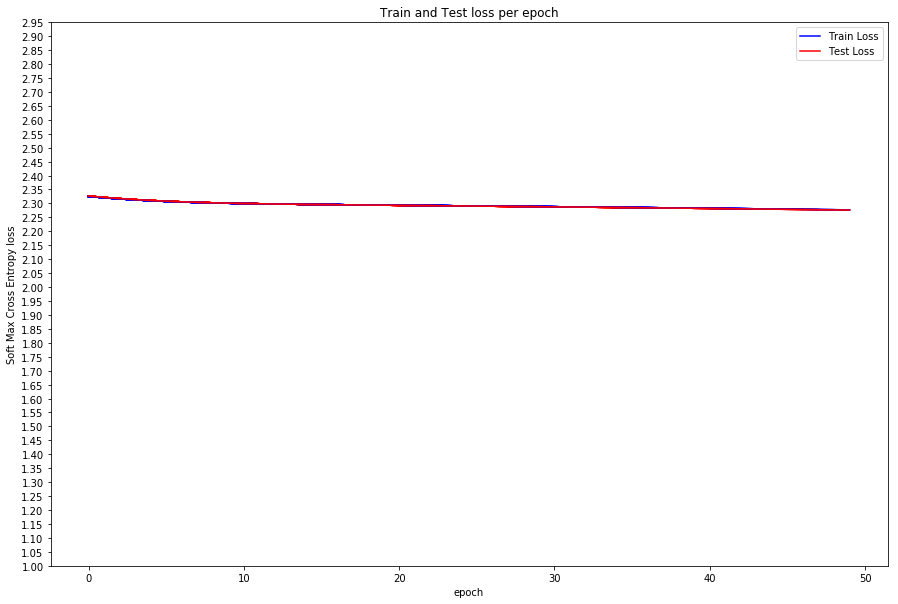

In [0]:
run_mlp(activation_fn='Sigmoid', dropout=False, batch_norm=False, optimizer='sgd')

## [Observations]
### 1. We can clearly see that SGD converges very slowly - the loss value is reducing very slowly even after 50 epochs
### 2. Also due to the combination of Sigmoid-SGD we are approaching to vanishing Gradient problem.
### 3. Also the accuracy is very poor only 15%

## [Model:2] Input --BN--Dropout-- Sigmoid --BN--Dropout-- Sigmoid --BN--Dropout-- Softmax

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use tf.cast instead.
Training cost at begining:  2.465314272  Test cost at begining:  2.318375249
Training cost at   ending:  2.277660196  Test cost at   ending:  1.968764635
Accuracy: 0.7963


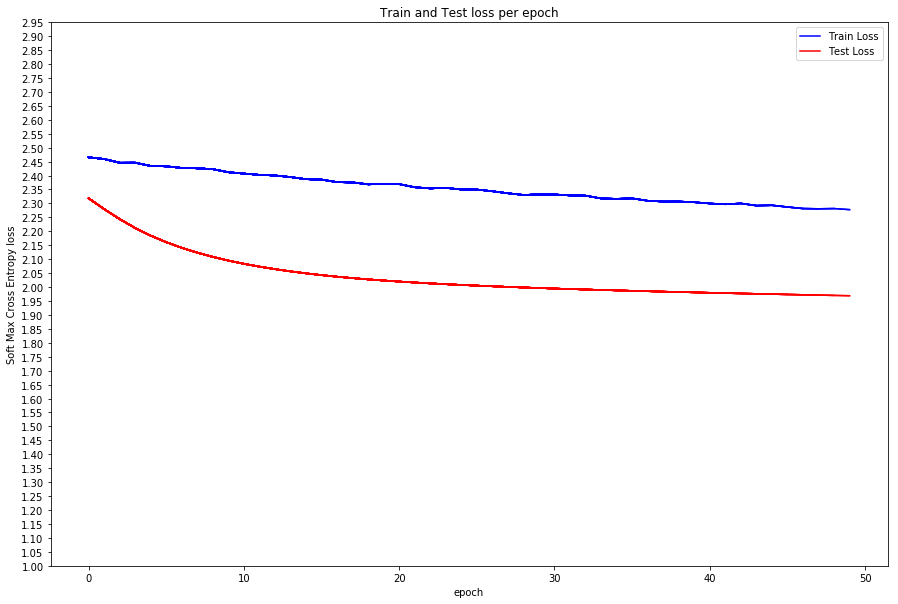

In [13]:
run_mlp(activation_fn='Sigmoid', dropout=True, batch_norm=True, optimizer='sgd')

## [Observations]
### 1. We can clearly see that SGD converges very slowly - the loss value is reducing very slowly even after 50 epochs even after batch normalization and dropouts
### 2. Also due to the combination of Sigmoid-SGD we are approaching to vanishing Gradient problem.
### 3. Using batch normalization and dropout the acuuracy drastically increased to 79%

## [Model:3] Input --BN--Dropout-- Relu --BN--Dropout-- Relu --BN--Dropout-- Softmax

Training cost at begining:  2.45090138  Test cost at begining:  2.29342534
Training cost at   ending:  2.082846492  Test cost at   ending:  1.87422549
Accuracy: 0.861


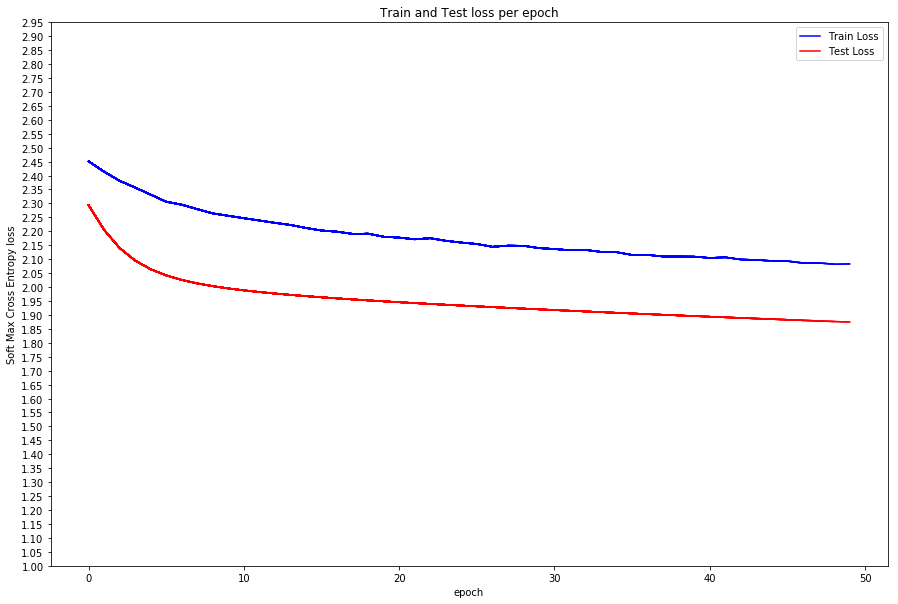

In [14]:
run_mlp(activation_fn='Relu', dropout=True, batch_norm=True, optimizer='sgd')

## [Observations]
### 1. Relu gives a better accuracy of 86%


Training cost at begining:  2.110635172  Test cost at begining:  1.882413206
Training cost at   ending:  1.58580665  Test cost at   ending:  1.480954563
Accuracy: 0.9783


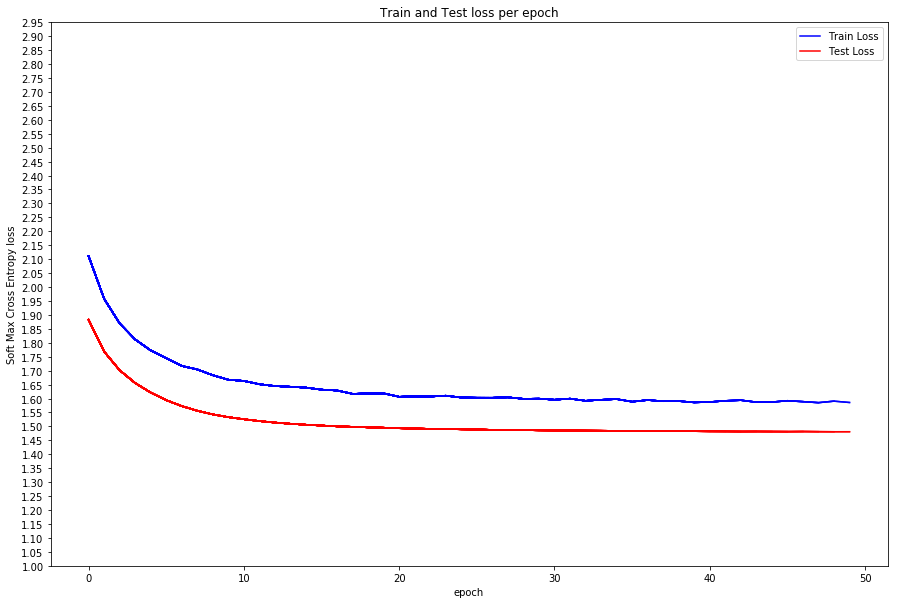

In [16]:
run_mlp(activation_fn='Sigmoid', dropout=True, batch_norm=True, optimizer='adam')

## [Observations]
### 1. Using Adam we can clearly see that the cost function converges really fast.
### 2. The accuracy is also very good of 97%

Training cost at begining:  2.014112071  Test cost at begining:  1.833914127
Training cost at   ending:  1.568576553  Test cost at   ending:  1.476285297
Accuracy: 0.9833


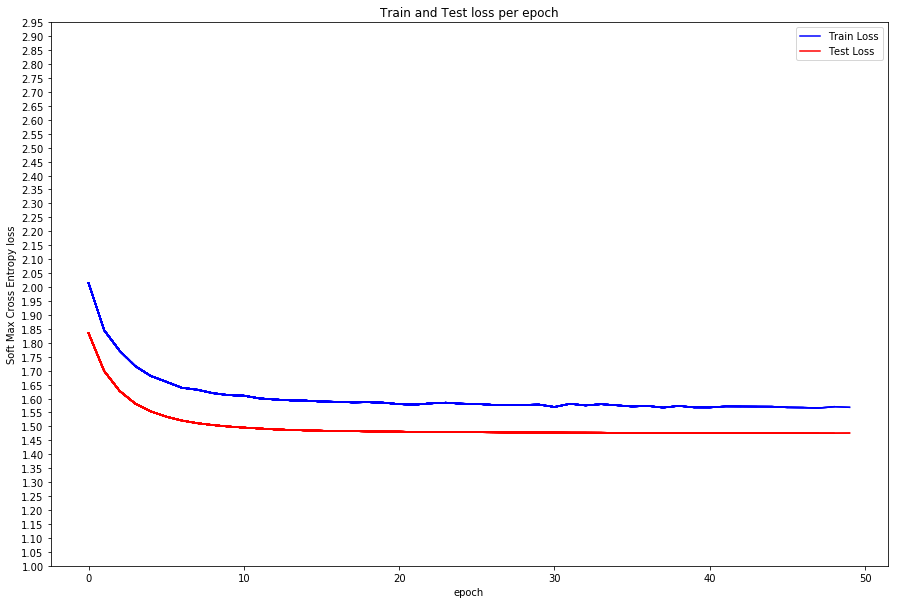

In [18]:
run_mlp(activation_fn='Relu', dropout=True, batch_norm=True, optimizer='adam')

## [Observations]
### 1. The best combination gave the best results.
### 2. No valinishing gradient problem sue to Relu.
### 3. Quick convergence due to Adam optimizer
### 4. The best accuracy of 98%